<a href="https://colab.research.google.com/github/Tony966012/project-1/blob/main/G3_Finalcode_Part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction based on LSTM forecasting model with data downloaded from Yahoo Finance


In [ ]:
# Import pandas and yfinance
import pandas as pd
import yfinance as yf

# Import numpy
import numpy as np
from numpy import *
from numpy.linalg import multi_dot

# Plot settings
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 16, 8
# Data manipulation
import pandas as pd
import numpy as np
from numpy.linalg import multi_dot

from scipy.stats import norm
from tabulate import tabulate




In [ ]:
# MTSLX STOCK LIST
symbols = ['AAPL', 'META', 'AMZN', 'MSFT','NVDA']


# Number of assets
numofasset = len(symbols)

# Number of portfolio for optimization
numofportfolio = 5000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
excel_file_path = '/content/drive/MyDrive/申请表1海南/new_prediction.xlsx'
excel_data = pd.read_excel(excel_file_path)


KeyboardInterrupt: ignored

In [ ]:
df = excel_data
# Check first 5 values
df.head()

,AAPL,META,AMZN,MSFT,NVDA
0,154.533340,164.952332,120.849236,258.912903,183.139053
1,156.177460,165.510117,122.560974,264.015137,187.129532
2,158.052399,164.528793,125.949142,268.661285,189.347092
3,159.679611,162.733261,128.748688,270.821075,189.502594
4,158.984970,161.827972,130.603943,270.309204,190.488739


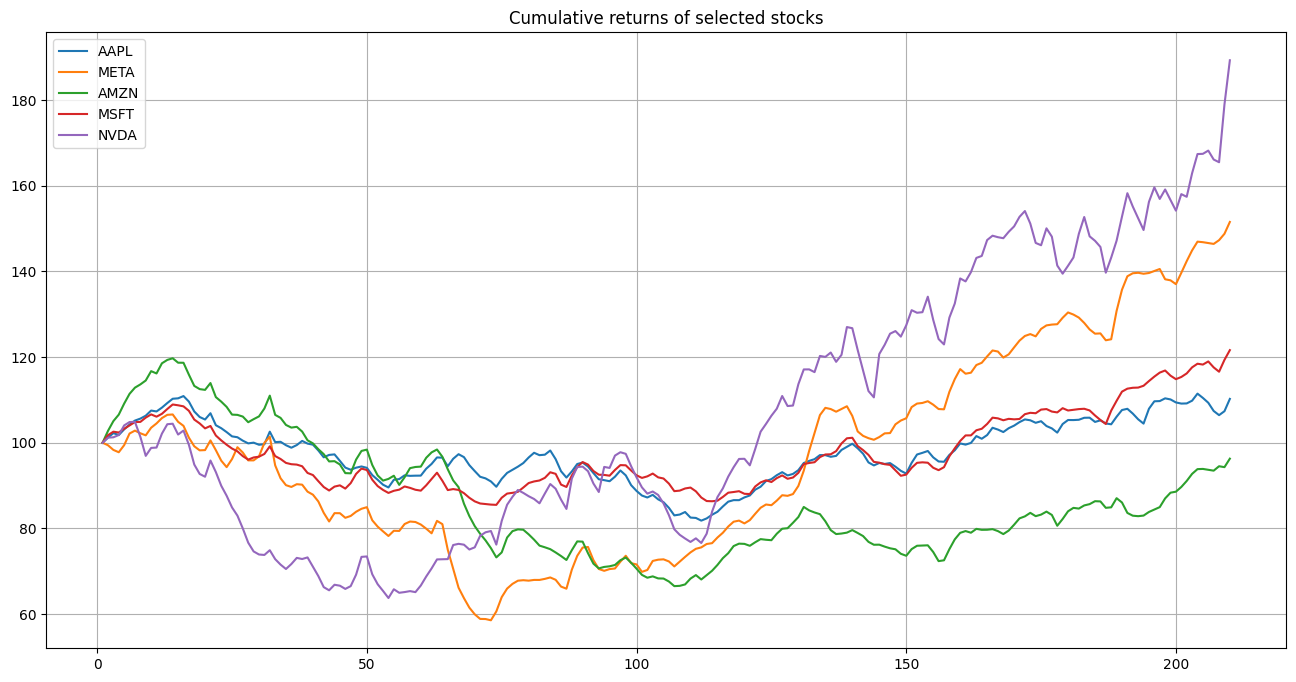

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax = plt.axes()



ax.set_title('Cumulative returns of selected stocks')
ax.plot(df[-210:] / df.iloc[-210] * 100)

ax.legend(df.columns, loc='upper left')
ax.grid(True)

plt.show()


In [ ]:
# Calculate returns
returns = df.pct_change().fillna(0)
returns.head()

,AAPL,META,AMZN,MSFT,NVDA
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010639,0.003381,0.014164,0.019706,0.021789
2,0.012005,-0.005929,0.027645,0.017598,0.011850
3,0.010295,-0.010913,0.022228,0.008039,0.000821
4,-0.004350,-0.005563,0.014410,-0.001890,0.005204


### Maximum Sharpe Ratio Portfolio

In [ ]:
# Max sharpe ratio portfolio
msrp = msrp_df.iloc[msrp_df['sharpe_ratio'].idxmax()]
msrp

NameError: ignored

In [ ]:
# Max sharpe ratio portfolio weights
max_sharpe_port_wts = msrp_df['weights'][msrp_df['sharpe_ratio'].idxmax()]

# Allocation to achieve max sharpe ratio portfolio
dict(zip(symbols,np.around(max_sharpe_port_wts*100,2)))

{'AAPL': 1.43, 'META': 43.71, 'AMZN': 0.86, 'MSFT': 11.32, 'NVDA': 42.69}

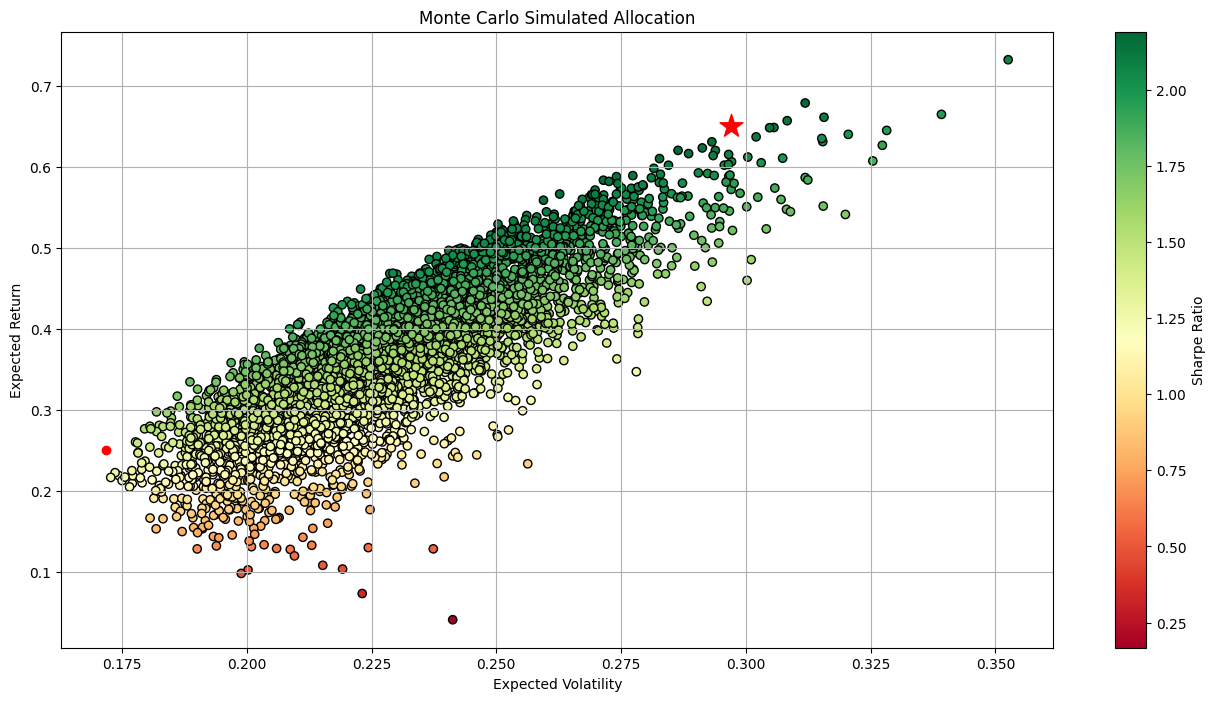

In [ ]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols,
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio')

# Maximum sharpe ratio portfolio
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')
# Mark the minimum variance portfolio
plt.scatter(portfolio_volatilities[min_variance_index], portfolio_returns[min_variance_index], color='red', label='Minimum Variance Portfolio')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

### Efficient Frontier

In [ ]:
# Import optimization module from scipy
import scipy.optimize as sco

In [ ]:
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

In [ ]:
# Each asset boundary ranges from 0 to 1
tuple((0, 1) for x in range(numofasset))

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [ ]:
# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

NameError: ignored

In [ ]:
opt_sharpe

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.217921075499191
       x: [ 3.879e-19  4.704e-01  0.000e+00  0.000e+00  5.296e-01]
     nit: 6
     jac: [ 4.206e-01 -4.335e-04  1.120e+00  4.796e-02  3.850e-04]
    nfev: 36
    njev: 6

In [ ]:
import pandas as pd

returns = df.pct_change().fillna(0)
weights1 = [0.0, 47.04, 0.0, 0.0, 52.96]
weights2 = [40.04, 0.0, 0.0, 59.96, 0.0]

# Calculate the portfolio daily return for weights1
portfolio_return1 = (returns * weights1*0.01).sum(axis=1)

# Calculate the portfolio daily return for weights2
portfolio_return2 = (returns * weights2*0.01).sum(axis=1)

# Print the portfolio daily returns
print("Portfolio Daily Return (weights1):")
print(portfolio_return1)

print("\nPortfolio Daily Return (weights2):")
print(portfolio_return2)


Portfolio Daily Return (weights1):
0      0.000000
1      0.013130
2      0.003487
3     -0.004699
4      0.000139
         ...   
206    0.001774
207   -0.007247
208    0.000786
209    0.047946
210    0.039279
Length: 211, dtype: float64

Portfolio Daily Return (weights2):
0      0.000000
1      0.016076
2      0.015359
3      0.008943
4     -0.002875
         ...   
206   -0.000399
207   -0.014026
208   -0.008805
209    0.017708
210    0.022155
Length: 211, dtype: float64


In [ ]:
import yfinance as yf

# Download S&P 500 data
sp500 = yf.download('^GSPC', start='2022-07-28', end='2023-5-31', progress=False)

# Calculate daily returns
sp500['Daily_Return'] = sp500['Close'].pct_change().fillna(0)

# Print the daily returns
print(sp500['Daily_Return'])
plt.plot

Date
2022-07-28    0.000000
2022-07-29    0.014208
2022-08-01   -0.002823
2022-08-02   -0.006662
2022-08-03    0.015638
                ...   
2023-05-23   -0.011222
2023-05-24   -0.007319
2023-05-25    0.008758
2023-05-26    0.013049
2023-05-30    0.000017
Name: Daily_Return, Length: 211, dtype: float64


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [ ]:
import pandas as pd

# Create the 'comparation' DataFrame
comparation = pd.DataFrame()
comparation['maxsharpe daily returns'] = portfolio_return1
comparation['minvar daily returns'] = portfolio_return2

sp500.reset_index(drop=True, inplace=True)
comparation['sp500 daily returns'] = sp500['Daily_Return']  # Make sure column name matches the one in the DataFrame

comparation.dropna(inplace=True)

# Print the 'comparation' DataFrame
print(comparation)


     maxsharpe daily returns  minvar daily returns  sp500 daily returns
0                   0.000000              0.000000             0.000000
1                   0.013130              0.016076             0.014208
2                   0.003487              0.015359            -0.002823
3                  -0.004699              0.008943            -0.006662
4                   0.000139             -0.002875             0.015638
..                       ...                   ...                  ...
206                 0.001774             -0.000399            -0.011222
207                -0.007247             -0.014026            -0.007319
208                 0.000786             -0.008805             0.008758
209                 0.047946              0.017708             0.013049
210                 0.039279              0.022155             0.000017

[211 rows x 3 columns]


In [ ]:
def calculate_cumulative_returns(daily_returns):
    cumulative_returns = (1 + daily_returns).cumprod() - 1
    return cumulative_returns

# Example usage

comparation['maxsharpe cumulative  returns']= calculate_cumulative_returns(comparation['maxsharpe daily returns'])
comparation['minvar cumulative returns']= calculate_cumulative_returns(comparation['minvar daily returns'])
comparation['sp500 cumulative returns']=calculate_cumulative_returns(comparation['sp500 daily returns'])
print(comparation)

     maxsharpe daily returns  minvar daily returns  sp500 daily returns  \
0                   0.000000              0.000000             0.000000   
1                   0.013130              0.016076             0.014208   
2                   0.003487              0.015359            -0.002823   
3                  -0.004699              0.008943            -0.006662   
4                   0.000139             -0.002875             0.015638   
..                       ...                   ...                  ...   
206                 0.001774             -0.000399            -0.011222   
207                -0.007247             -0.014026            -0.007319   
208                 0.000786             -0.008805             0.008758   
209                 0.047946              0.017708             0.013049   
210                 0.039279              0.022155             0.000017   

     maxsharpe cumulative  returns  minvar cumulative returns  \
0                         0.000000

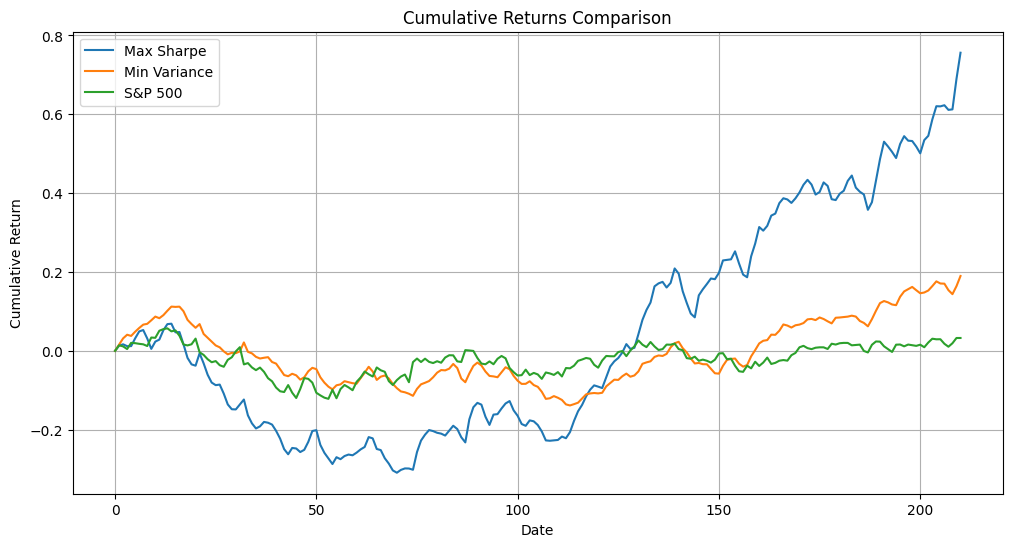

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate cumulative returns
comparation['maxsharpe cumulative returns'] = (1 + comparation['maxsharpe daily returns']).cumprod() - 1
comparation['minvar cumulative returns'] = (1 + comparation['minvar daily returns']).cumprod() - 1
comparation['sp500 cumulative returns'] = (1 + comparation['sp500 daily returns']).cumprod() - 1

# Create a new Figure and Axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative returns of maxsharpe
ax.plot(comparation.index, comparation['maxsharpe cumulative returns'], label='Max Sharpe')

# Plot the cumulative returns of minvar
ax.plot(comparation.index, comparation['minvar cumulative returns'], label='Min Variance')

# Plot the cumulative returns of S&P 500
ax.plot(comparation.index, comparation['sp500 cumulative returns'], label='S&P 500')

# Set the chart title and labels
ax.set_title('Cumulative Returns Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')

# Display the legend
ax.legend()

# Display the grid lines
ax.grid(True)

# Show the chart
plt.show()


KeyError: ignored

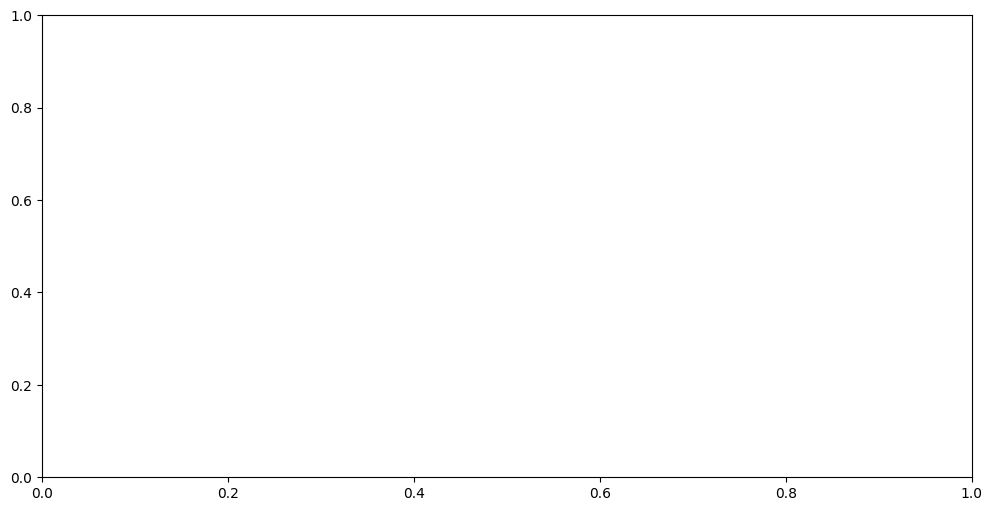

In [ ]:
# Create a new Figure and Axes object
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the cumulative returns of maxsharpe
ax.plot(comparation.index, comparation['maxsharpe cumulative returns'], label='Max Sharpe')

# Plot the cumulative returns of minvar
ax.plot(comparation.index, comparation['minvar cumulative returns'], label='Min Variance')

# Plot the cumulative returns of S&P 500
ax.plot(comparation.index, comparation['sp500 cumulative returns'], label='S&P 500')
# Set the chart title and labels
ax.set_title('Cumulative Returns Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')

# Display the legend
ax.legend()

# Display the grid lines
ax.grid(True)

# Show the chart
plt.show()

In [ ]:
def calculate_cumulative_returns(daily_returns):
    cumulative_returns = (1 + daily_returns).cumprod() - 1
    return cumulative_returns

# Example usage

cumulative_returns1= calculate_cumulative_returns(portfolio_return1)
cumulative_returns2= calculate_cumulative_returns(portfolio_return2)
print(f"Cumulative Returns: {cumulative_returns}")


In [ ]:
def calculate_cumulative_return(daily_returns):
    cumulative_return = 1.0
    for return_value in daily_returns:
        cumulative_return *= (1 + return_value)
    cumulative_return -= 1.0
    return cumulative_return


maxsharpe_returns
cumulative_return = calculate_cumulative_return(maxsharpe_returns)
print(f"Cumulative Return: {cumulative_return:.4f}")


Cumulative Return: -61794693982461173314342617088.0000


In [ ]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats,np.around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', 0.7266), ('Volatility', 0.3276), ('Sharpe Ratio', 2.2179)]

In [ ]:
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

In [ ]:
# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
opt_var

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.028272106558620183
       x: [ 4.004e-01  0.000e+00  0.000e+00  5.996e-01  0.000e+00]
     nit: 12
     jac: [ 5.654e-02  6.685e-02  5.919e-02  5.654e-02  1.004e-01]
    nfev: 72
    njev: 12

In [ ]:
# Portfolio weights
list(zip(symbols,np.around(opt_var['x']*100,2)))

[('AAPL', 40.04), ('META', 0.0), ('AMZN', 0.0), ('MSFT', 59.96), ('NVDA', 0.0)]

In [ ]:
weights2 = [item[1] for item in zip(symbols, np.around(opt_var['x']*100, 2))]
weights2

[40.04, 0.0, 0.0, 59.96, 0.0]

In [ ]:
minvar_returns = returns.dot(weights2)
minvar_returns


0      0.000000
1      1.607590
2      1.535866
3      0.894251
4     -0.287511
         ...   
206   -0.039869
207   -1.402554
208   -0.880537
209    1.770760
210    2.215488
Length: 211, dtype: float64

In [ ]:
def calculate_cumulative_return(daily_returns):
    cumulative_return = 1.0
    for return_value in daily_returns:
        cumulative_return *= (1 + return_value)
    cumulative_return -= 1.0
    return cumulative_return


maxsharpe_returns
cumulative_return = calculate_cumulative_return(minvar_returns)
print(f"Cumulative Return: {cumulative_return:.4f}")


Cumulative Return: -1.0000


In [ ]:
# Portfolio stats
list(zip(stats,np.around(portfolio_stats(opt_var['x']),4)))

[('Returns', 0.2218), ('Volatility', 0.1681), ('Sharpe Ratio', 1.3192)]

In [ ]:
# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [ ]:
targetrets = linspace(0.28,0.44,100)
tvols = []

for tr in targetrets:

    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)

    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

<ipython-input-149-fea90b758c9e>:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols,


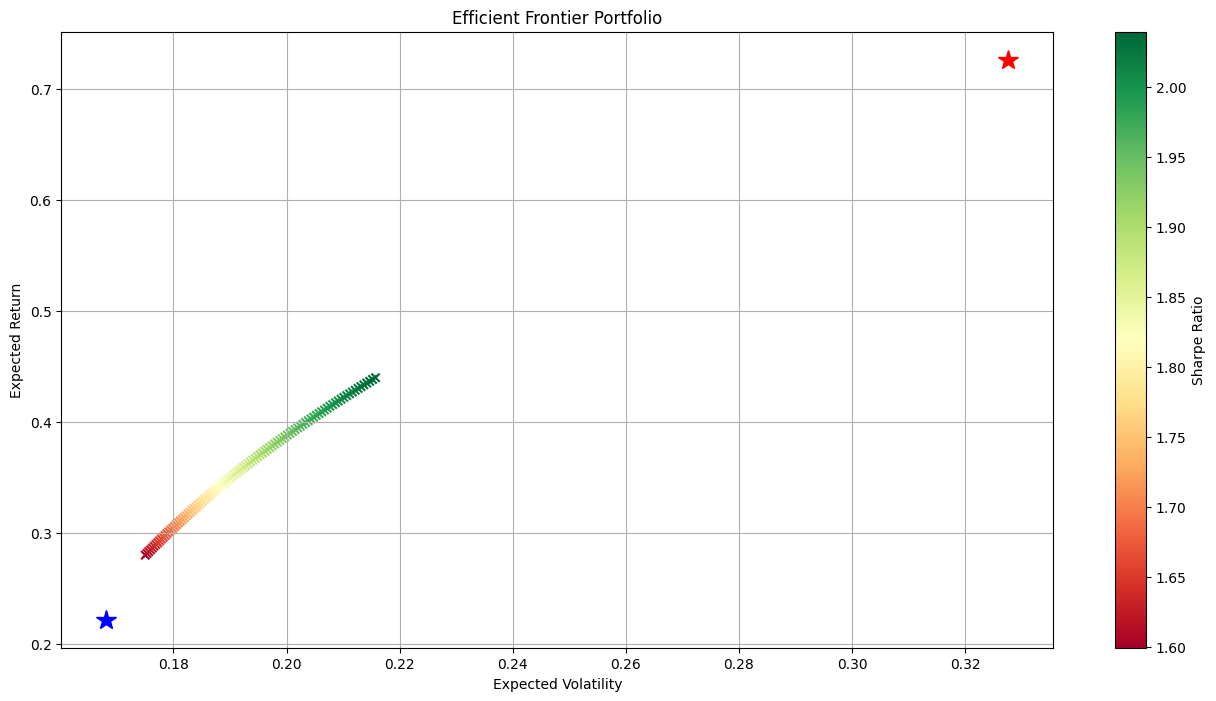

In [ ]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Efficient Frontier Portfolio')

# Efficient Frontier
fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols,
                        marker='x', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio')

# Maximum Sharpe Portfolio
ax.plot(portfolio_stats(opt_sharpe['x'])[1], portfolio_stats(opt_sharpe['x'])[0], 'r*', markersize =15.0)

# Minimum Variance Portfolio
ax.plot(portfolio_stats(opt_var['x'])[1], portfolio_stats(opt_var['x'])[0], 'b*', markersize =15.0)

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

######

In [ ]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data
start_date = '2022-01-01'
end_date = '2023-05-31'

# Download the historical data of the S&P 500 Index
sp500 = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

# Calculate the daily returns
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

# Calculate the cumulative returns
sp500['Cumulative Return'] = (1 + sp500['Daily Return']).cumprod()

# Print the DataFrame with cumulative returns
print(sp500[['Adj Close', 'Cumulative Return']].tail())

# Assuming you have the cumulative return values stored in a list called sp500_returns
sp500_returns = sp500['Cumulative Return'].tolist()

# Create a DataFrame from the list of cumulative returns
df = pd.DataFrame({'Cumulative Return': sp500_returns})

# Save the DataFrame to a CSV file
df.to_csv('sp500_returns.csv', index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv('sp500_returns.csv')

# Extract the cumulative return values as a list
sp500_returns = df['Cumulative Return'].tolist()



              Adj Close  Cumulative Return
Date                                      
2023-05-23  4145.580078           0.864282
2023-05-24  4115.240234           0.857957
2023-05-25  4151.279785           0.865470
2023-05-26  4205.450195           0.876764
2023-05-30  4205.520020           0.876778


In [ ]:
# Define the start and end dates for the data
start_date = '2022-01-01'
end_date = '2023-05-31'


# Download the historical data of the S&P 500 Index
sp500 = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

# Calculate the daily returns
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

# Calculate the cumulative returns
sp500['Cumulative Return'] = (1 + sp500['Daily Return']).cumprod()-1

comparation=pd.DataFrame()
comparation['maxsharpe daily returns']=
comparation['minvar daily returns']=minvar_returns
comparation['maxsharpe cumulative returns'] = (1 + maxsharpe_returns).cumprod() - 1
comparation['minvar cumulative returns'] = (1 + minvar_returns).cumprod() - 1
sp500.reset_index(drop=True, inplace=True)
comparation['sp500 cumulative returns']=sp500['Cumulative Return']
comparation['sp500 daily returns']=sp500['Daily Return']
comparation.dropna(inplace=True)
comparation



,maxsharpe daily returns,minvar daily returns,maxsharpe cumulative returns,minvar cumulative returns,sp500 cumulative returns,sp500 daily returns
1,1.313029,1.607590,1.313029e+00,1.607590,-0.000630,-0.000630
2,0.348693,1.535866,2.119566e+00,5.612498,-0.020010,-0.019393
3,-0.469862,0.894251,6.537996e-01,11.525732,-0.020955,-0.000964
4,0.013912,-0.287511,6.768070e-01,7.924440,-0.024920,-0.004050
5,1.962048,1.032178,3.966782e+00,17.136055,-0.026325,-0.001441
...,...,...,...,...,...,...
206,0.177433,-0.039869,-7.287248e+27,-1.000000,-0.206244,-0.006083
207,-0.724677,-1.402554,-2.006344e+27,-1.000000,-0.186696,0.024626
208,0.078618,-0.880537,-2.164078e+27,-1.000000,-0.192759,-0.007454
209,4.794557,1.770760,-1.253987e+28,-1.000000,-0.196070,-0.004101


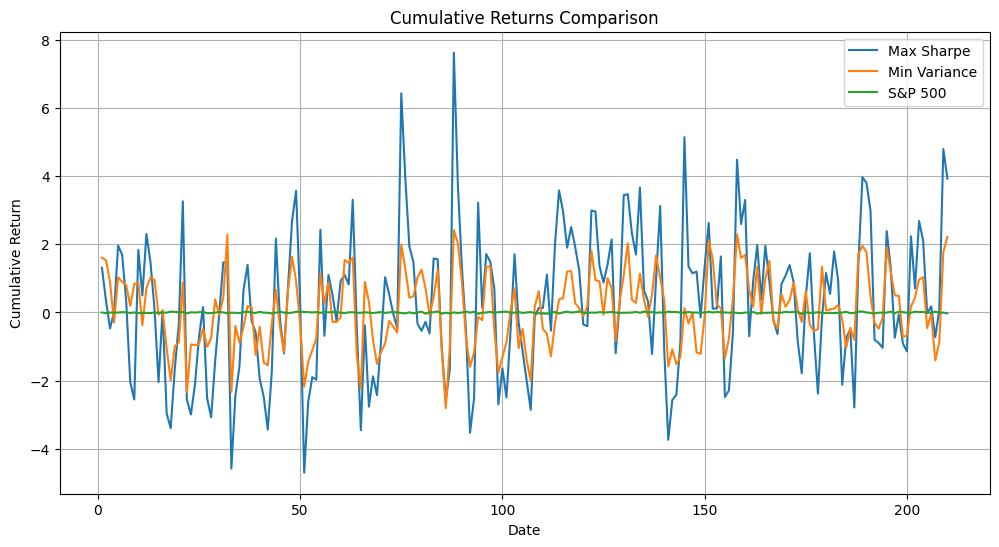

In [ ]:
# Create a new Figure and Axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative returns of maxsharpe
ax.plot(comparation.index, comparation['maxsharpe daily returns'], label='Max Sharpe')

# Plot the cumulative returns of minvar
ax.plot(comparation.index, comparation['minvar daily returns'], label='Min Variance')

# Plot the cumulative returns of S&P 500
ax.plot(comparation.index, comparation['sp500 daily returns'], label='S&P 500')

# Set the chart title and labels
ax.set_title('Cumulative Returns Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')

# Display the legend
ax.legend()

# Display the grid lines
ax.grid(True)

# Show the chart
plt.show()